In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
mag_ch = pd.read_csv('./magazine/final/magazine_ch_stickword.csv', encoding = 'utf-8', sep ='|')

In [4]:
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
mag_ch['ADFN'].head()

0                        [메탈, 레진, 귀고리, CHANEL, CHANEL]
1    [인스타그램, 에디터, 디자이너, 인, 플루, 계정, 막, 시작, 가을, 겨울, 상...
2                     [체인, 진주, 결합, 우아함을, CHANEL, 액세서리]
3    [주변, 친구, 좋아하고, 사고, 익숙한, 브랜드, 뭐, 있지, CHANEL, 에르...
4    [컬러, 블록, 조화로운, 부츠, CHANEL, CHANEL, 와인, 색, 하이, ...
Name: ADFN, dtype: object

In [13]:
mag_je = pd.read_csv('./magazine/final/mag_JECH.csv', encoding = 'utf-8', sep = '|')

In [80]:
mag_je['ADFN'] = mag_je['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

### top50 리스트 생성

In [16]:
top200 = pd.read_csv('./magazine/final/ch_ADFN_rank_dropword.csv', sep='|', encoding = 'utf-8')

In [17]:
top200

,word,count
0,CHANEL,5469
1,브랜드,921
2,KARL,882
3,쇼,735
4,모델,716
...,...,...
495,과정,55
496,스텔라,55
497,스톤,55
498,영향,55


In [94]:
top50 = []
for i in range(50):
    top50.append(top200.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['CHANEL', '브랜드', 'KARL', '쇼', '모델', '장식', '백', '그녀', '드레스', '파리', '여성', '스타일', '룩', '트위드', '컬러', '디자이너', '블랙', 'COUTURE', '재킷', '디자인', '주얼리', '코코', '하우스', '아이템', '세계', '화이트', 'GABRIELLE', '공방', '옷', '럭셔리', '다양한', '크루즈', 'VIRGINIE', '영감', '영화', '디렉터', '프랑스', '매력', '슈즈', '스커트', '골드', '가죽', '팬츠', 'HAUTE', '패션쇼', '가방', '슈트', '런웨이', '클래식', '여름']


### top100

In [54]:
top100 = []
for i in range(100):
    top100.append(top200.loc[i, 'word'])
    
print(len(top100))
print(top100[:91])

100
['CHANEL', '브랜드', 'KARL', '쇼', '모델', '장식', '백', '그녀', '드레스', '파리', '여성', '스타일', '룩', '트위드', '컬러', '디자이너', '블랙', 'COUTURE', '재킷', '디자인', '주얼리', '코코', '하우스', '아이템', '세계', '화이트', 'GABRIELLE', '공방', '옷', '럭셔리', '다양한', '크루즈', 'VIRGINIE', '영감', '영화', '디렉터', '프랑스', '매력', '슈즈', '스커트', '골드', '가죽', '팬츠', 'HAUTE', '패션쇼', '가방', '슈트', '런웨이', '클래식', '여름', '워치', '코트', '부츠', '팔레', '봄', '사랑', '로고', '향수', '크리에이티브', '핑크', '대표', '가을', '의상', '무대', '패턴', '겨울', '데님', '라인', '상징', '퍼렐', '다이아몬드', '책', '체인', '배우', '표현', '캠페인', '실루엣', '뉴욕', '향', '액세서리', '분위기', '스타일링', '미국', '하이', '칼', '트렌드', '자수', '사이즈', '남성', '매장', '제니']


### top50만 남기기

In [20]:
len(mag_ch)

1450

In [21]:
top50_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [22]:
top100_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

### 제니와 샤넬 df 합친 것 중 top50

In [25]:
jech_top50_word = []
for i in range(len(jech)):
    w=[]
    for word in jech.loc[i, 'ADFN']:
        if word in top50:
            w.append(word)
    jech_top50_word.append(w)

### 제니데이터 중 샤넬의 top50

In [96]:
jenny_top50_word = []
for i in range(len(mag_je)):
    w=[]
    for word in mag_je.loc[i, 'ADFN']:
        if word in top51:
            w.append(word)
    jenny_top50_word.append(w)

### 제니데이터 중 샤넬의 top100

In [84]:
jenny_top100_word = []
for i in range(len(mag_je)):
    w=[]
    for word in mag_je.loc[i, 'ADFN']:
        if word in top100:
            w.append(word)
    jenny_top100_word.append(w)

### item 남기기

In [168]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [169]:
item_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in item:
            w.append(word)
    item_word.append(w)

### top100이면서 item이 아닌 것

In [170]:
top100_not_item_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top100:
            if word not in item:
                w.append(word)
    top100_not_item_word.append(w)

In [171]:
len(top100_not_item_word)

1450

In [172]:
top100_not_item_word[1]

['디자이너',
 '가을',
 '겨울',
 '스타일링',
 '모델',
 'CHANEL',
 '클래식',
 '룩',
 'CHANEL',
 '여성',
 'CHANEL',
 '가브리엘',
 '디자인',
 '디자인',
 '사랑',
 '사랑',
 '사랑',
 '라인',
 '라인',
 '클래식',
 '라인',
 'CHANEL']

### top100이면서 common이 아닌 것

In [173]:
common = ['브랜드',
 '쇼',
 '모델',
 '장식',
 '드레스',
 '파리',
 '여성',
 '스타일',
 '컬러',
 '디자이너',
 '블랙',
 '재킷',
 '아이템',
 '옷',
 '디렉터',
 '팬츠']


In [174]:
top100_not_common_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top100:
            if word not in common:
                w.append(word)
    top100_not_common_word.append(w)

### top100이면서 common/item이 아닌 것

In [175]:
top100_not_common_item_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top100:
            if word not in common:
                if word not in item:
                    w.append(word)
    top100_not_common_item_word.append(w)

In [125]:
len(top50_word)

1450

In [126]:
top50_word[:5]

[['CHANEL', 'CHANEL'],
 ['디자이너',
  '가방',
  '모델',
  '옷',
  'CHANEL',
  '클래식',
  '백',
  '팬츠',
  '가방',
  'CHANEL',
  '여성',
  'CHANEL',
  '디자인',
  '디자인',
  '새로운',
  '옷',
  '재킷',
  '재킷',
  '재킷',
  '팬츠',
  '가방',
  '백',
  '백',
  '클래식',
  'CHANEL',
  '백'],
 ['CHANEL'],
 ['브랜드',
  'CHANEL',
  '브랜드',
  '새로운',
  '브랜드',
  '럭셔리',
  '브랜드',
  '럭셔리',
  '브랜드',
  '브랜드',
  'CHANEL'],
 ['컬러', 'CHANEL', 'CHANEL']]

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [61]:
# 어프라이어리(Apriori)
from apyori import apriori

In [62]:
top50_word[0]

['CHANEL', 'CHANEL']

In [63]:
len(jech_top50_word)

1614

In [64]:
jech_top50_word[1600:]

[[],
 ['쇼', '쇼', '쇼', '쇼'],
 [],
 ['쇼', '쇼'],
 [],
 [],
 ['룩'],
 ['쇼', '옷', '옷', '옷'],
 ['쇼', '쇼', '쇼', '쇼'],
 [],
 [],
 [],
 [],
 []]

In [97]:
# 지지도(support) : P(A∩B)
result = list(apriori(jenny_top50_word, min_support = 0.01))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
401,"(스타일, 제니)",0.317073,"[((), (스타일, 제니), 0.3170731707317073, 1.0), ((스...",2
475,"(컬러, 제니)",0.250000,"[((), (컬러, 제니), 0.25, 1.0), ((제니), (컬러), 0.280...",2
246,"(룩, 제니)",0.243902,"[((), (룩, 제니), 0.24390243902439024, 1.0), ((룩)...",2
66,"(CHANEL, 제니)",0.182927,"[((), (CHANEL, 제니), 0.18292682926829268, 1.0),...",2
128,"(그녀, 제니)",0.176829,"[((), (그녀, 제니), 0.17682926829268292, 1.0), ((그...",2
270,"(매력, 제니)",0.164634,"[((), (매력, 제니), 0.16463414634146342, 1.0), ((매...",2
352,"(블랙, 제니)",0.164634,"[((), (블랙, 제니), 0.16463414634146342, 1.0), ((블...",2
482,"(화이트, 제니)",0.146341,"[((), (화이트, 제니), 0.14634146341463414, 1.0), ((...",2
332,"(브랜드, 제니)",0.146341,"[((), (브랜드, 제니), 0.14634146341463414, 1.0), ((...",2
248,"(룩, 컬러)",0.140244,"[((), (룩, 컬러), 0.1402439024390244, 1.0), ((룩),...",2


### networkx 그래프 정의

In [98]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [99]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [100]:
pos = nx.spring_layout(G)

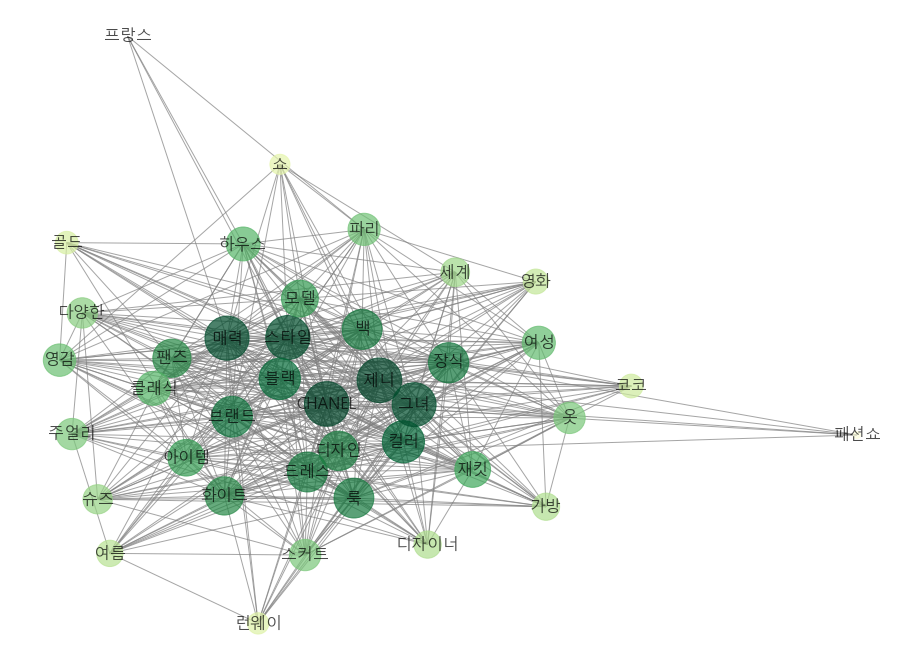

<Figure size 432x288 with 0 Axes>

In [101]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)
plt.show()
plt.savefig('./jenny_in_top100.png', bbox_inches = 'tight')

In [102]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']